<a href="https://colab.research.google.com/github/sijuswamy/intel-unnati-training/blob/main/Decision_Tree_using_LDT_ID3_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
eps = np.finfo(float).eps
from numpy import log2 as log

## Create the dataset for the DT problem

In [ ]:
#creating data as lists
outlook = 'overcast,overcast,overcast,overcast,rainy,rainy,rainy,rainy,rainy,sunny,sunny,sunny,sunny,sunny'.split(',')
temp = 'hot,cool,mild,hot,mild,cool,cool,mild,mild,hot,hot,mild,cool,mild'.split(',')
humidity = 'high,normal,high,normal,high,normal,normal,normal,high,high,high,high,normal,normal'.split(',')
windy = 'FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE'.split(',')
play = 'yes,yes,yes,yes,yes,yes,no,yes,no,no,no,no,yes,yes'.split(',')

In [ ]:
outlook

['overcast',
 'overcast',
 'overcast',
 'overcast',
 'rainy',
 'rainy',
 'rainy',
 'rainy',
 'rainy',
 'sunny',
 'sunny',
 'sunny',
 'sunny',
 'sunny']

## Creating a `Pandas` dataframe from the dictionary

In [ ]:
#creating a datadrame of input data
dataset ={'outlook':outlook,'temp':temp,'humidity':humidity,'windy':windy,'play':play}
df = pd.DataFrame(dataset,columns=['outlook','temp','humidity','windy','play'])

In [ ]:
df

,outlook,temp,humidity,windy,play
0,overcast,hot,high,FALSE,yes
1,overcast,cool,normal,TRUE,yes
2,overcast,mild,high,TRUE,yes
3,overcast,hot,normal,FALSE,yes
4,rainy,mild,high,FALSE,yes
5,rainy,cool,normal,FALSE,yes
6,rainy,cool,normal,TRUE,no
7,rainy,mild,normal,FALSE,yes
8,rainy,mild,high,TRUE,no
9,sunny,hot,high,FALSE,no


In [ ]:
# visualizing the dictionary
df

,outlook,temp,humidity,windy,play
0,overcast,hot,high,FALSE,yes
1,overcast,cool,normal,TRUE,yes
2,overcast,mild,high,TRUE,yes
3,overcast,hot,normal,FALSE,yes
4,rainy,mild,high,FALSE,yes
5,rainy,cool,normal,FALSE,yes
6,rainy,cool,normal,TRUE,no
7,rainy,mild,normal,FALSE,yes
8,rainy,mild,high,TRUE,no
9,sunny,hot,high,FALSE,no



## Steps in Learning DT
1. compute the entropy for data-set
2.for every attribute/feature:
       1.calculate entropy for all categorical values
       2.take average information entropy for the current attribute
       3.calculate gain for the current attribute
3. pick the highest gain attribute.
4. Repeat until we get the tree we desired

## Code Chuncks to explain the calculation of entropy and information gain 

In [ ]:
##1. calculate entropy of the whole dataset

entropy_node = 0  #Initialize Entropy
values = df.play.unique()  #Unique objects - 'Yes', 'No'
for value in values:
    fraction = df.play.value_counts()[value]/len(df.play)  
    entropy_node += -fraction*np.log2(fraction)

In [ ]:
entropy_node

0.9402859586706311

In [ ]:
## function to calculate entropy at each node
def ent(df,attribute):
    target_variables = df.play.unique()  #This gives all 'Yes' and 'No'
    variables = df[attribute].unique()    #This gives different features in that attribute (like 'high' )


    entropy_attribute = 0
    for variable in variables:
        entropy_each_feature = 0
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute]==variable][df.play ==target_variable]) #numerator
            den = len(df[attribute][df[attribute]==variable])  #denominator
            fraction = num/(den+eps)  #probablity of i th option in the attribute
            entropy_each_feature += -fraction*log(fraction+eps) #This calculates entropy for one feature like 'high'
        fraction2 = den/len(df)
        entropy_attribute += -fraction2*entropy_each_feature   #Sums up all the entropy temp

    return(abs(entropy_attribute))

In [ ]:
## calculating entropy of each feature
a_entropy = {k:ent(df,k) for k in df.keys()[:-1]}
a_entropy

{'outlook': 0.6935361388961914,
 'temp': 0.9110633930116756,
 'humidity': 0.7884504573082889,
 'windy': 0.892158928262361}

In [ ]:
## function calculate information gain
def ig(e_dataset,e_attr):
    return(e_dataset-e_attr)

In [ ]:
#entropy_node = entropy of dataset
#a_entropy[k] = entropy of k(th) attr
IG = {k:ig(entropy_node,a_entropy[k]) for k in a_entropy}

In [ ]:
IG

{'outlook': 0.24674981977443977,
 'temp': 0.029222565658955535,
 'humidity': 0.15183550136234225,
 'windy': 0.048127030408270155}

## Working code for ID3 LDT algorithm



In [ ]:
# writting a general code for finding entropy
def find_entropy(df):
    Samplespace = df.keys()[-1]   #To make the code generic, changing target variable class name
    entropy = 0
    values = df[Samplespace].unique()
    for value in values:
        fraction = df[Samplespace].value_counts()[value]/len(df[Samplespace])
        entropy += -fraction*np.log2(fraction)
    return entropy

In [ ]:
def find_entropy_attribute(df,attribute):
  Samplespace = df.keys()[-1]   #To make the code generic, changing target variable class name
  target_variables = df[Samplespace].unique()  #This gives all 'Yes' and 'No'
  variables = df[attribute].unique()    #This gives different features in that attribute (like 'Hot','Cold' in Temperature)
  entropy2 = 0
  for variable in variables:
      entropy = 0
      for target_variable in target_variables:
          num = len(df[attribute][df[attribute]==variable][df[Samplespace] ==target_variable])
          den = len(df[attribute][df[attribute]==variable])
          fraction = num/(den+eps)
          entropy += -fraction*log(fraction+eps)
      fraction2 = den/len(df)
      entropy2 += -fraction2*entropy
  return abs(entropy2)

In [ ]:
def find_winner(df):
    Entropy_att = []
    IG = []
    for key in df.keys()[:-1]:
#         Entropy_att.append(find_entropy_attribute(df,key))
        IG.append(find_entropy(df)-find_entropy_attribute(df,key))
    return df.keys()[:-1][np.argmax(IG)]
  
  
def get_subtable(df, node,value):
  return df[df[node] == value].reset_index(drop=True)


In [ ]:
def buildTree(df,tree=None): 
    Samplespace = df.keys()[-1]   #To make the code generic, changing target variable class name
    DEC=df.columns[-1]
    #Here we build our decision tree

    #Get attribute with maximum information gain
    node = find_winner(df)
    
    #Get distinct value of that attribute e.g Salary is node and Low,Med and High are values
    attValue = np.unique(df[node])
    
    #Create an empty dictionary to create tree    
    if tree is None:                    
        tree={}
        tree[node] = {}
    
   #We make loop to construct a tree by calling this function recursively. 
    #In this we check if the subset is pure and stops if it is pure. 

    for value in attValue:
        
        subtable = get_subtable(df,node,value)
        clValue,counts = np.unique(subtable[DEC],return_counts=True)                        
        
        if len(counts)==1:#Checking purity of subset
            tree[node][value] = clValue[0]                                                    
        else:        
            tree[node][value] = buildTree(subtable) #Calling the function recursively 
                   
    return tree

In [ ]:
#running the code to build the tree with given dataset
tree=buildTree(df)

In [ ]:
# printing the tree
import pprint
pprint.pprint(tree)

{'outlook': {'overcast': 'yes',
             'rainy': {'windy': {'FALSE': 'yes', 'TRUE': 'no'}},
             'sunny': {'humidity': {'high': 'no', 'normal': 'yes'}}}}


In [ ]:
#code to visualize the decision tree
import pydot
import uuid

def generate_unique_node():
    """ Generate a unique node label."""
    return str(uuid.uuid1())

def create_node(graph, label, shape='oval'):
    node = pydot.Node(generate_unique_node(), label=label, shape=shape)
    graph.add_node(node)
    return node

def create_edge(graph, node_parent, node_child, label):
    link = pydot.Edge(node_parent, node_child, label=label)
    graph.add_edge(link)
    return link

def walk_tree(graph, dictionary, prev_node=None):
    """ Recursive construction of a decision tree stored as a dictionary """
    for parent, child in dictionary.items():
        # root
        if not prev_node: 
            root = create_node(graph, parent)
            walk_tree(graph, child, root)
            continue
            
        # node
        if isinstance(child, dict):
            for p, c in child.items():
                n = create_node(graph, p)
                create_edge(graph, prev_node, n, str(parent))
                walk_tree(graph, c, n)
    
        # leaf
        else: 
            leaf = create_node(graph, str(child), shape='box')
            create_edge(graph, prev_node, leaf, str(parent))




In [ ]:
def plot_tree(dictionary, filename="DecisionTree.png"):
    graph = pydot.Dot(graph_type='graph')
    walk_tree(graph, tree)
    graph.write_png(filename)
        

In [ ]:
plot_tree(tree)

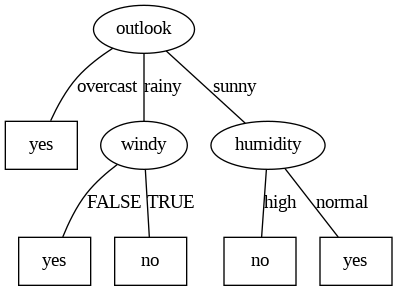

In [ ]:
from IPython.display import Image
Image('/content/DecisionTree.png')

## Machine Learning Algorithm for Decision Tree

### Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

df['outlook'] = Le.fit_transform(df['outlook'])
df['temp'] = Le.fit_transform(df['temp'])
df['humidity'] = Le.fit_transform(df['humidity'])
df['windy'] = Le.fit_transform(df['windy'])
df['play'] = Le.fit_transform(df['play'])

In [ ]:
#checking updated dataframe
df

,outlook,temp,humidity,windy,play
0,0,1,0,0,1
1,0,0,1,1,1
2,0,2,0,1,1
3,0,1,1,0,1
4,1,2,0,0,1
5,1,0,1,0,1
6,1,0,1,1,0
7,1,2,1,0,1
8,1,2,0,1,0
9,2,1,0,0,0


In [ ]:
#splitting training data and labels
y = df['play']
X = df.drop(['play'],axis=1)

In [ ]:
#display training data
X

,outlook,temp,humidity,windy
0,0,1,0,0
1,0,0,1,1
2,0,2,0,1
3,0,1,1,0
4,1,2,0,0
5,1,0,1,0
6,1,0,1,1
7,1,2,1,0
8,1,2,0,1
9,2,1,0,0


In [ ]:
# Fitting the model
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X, y)

[Text(0.4, 0.9, 'x[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.3, 0.5, 'x[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2, 0.3, 'x[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7, 0.5, 'x[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.3, 'x[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]')]

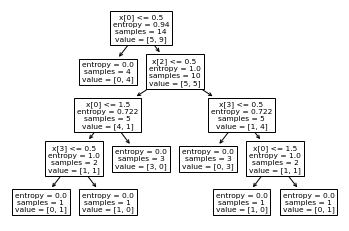

In [ ]:
# We can visualize the tree using tree.plot_tree
tree.plot_tree(clf)

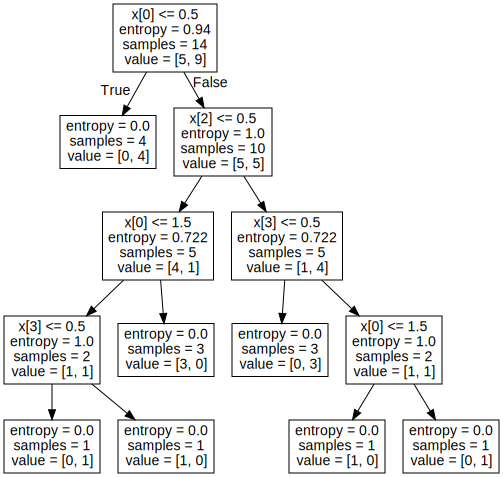

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In [ ]:
# The predictions are stored in X_pred
y_pred = clf.predict(X)

In [ ]:
# verifying if the model has predicted it all right.
y_pred == y

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: play, dtype: bool

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
cm = confusion_matrix(y, y_pred)
print(cm)

[[5 0]
 [0 9]]


## Using Gini score

In [ ]:
clfg = tree.DecisionTreeClassifier(criterion = 'gini')
clf2 = clfg.fit(X, y)

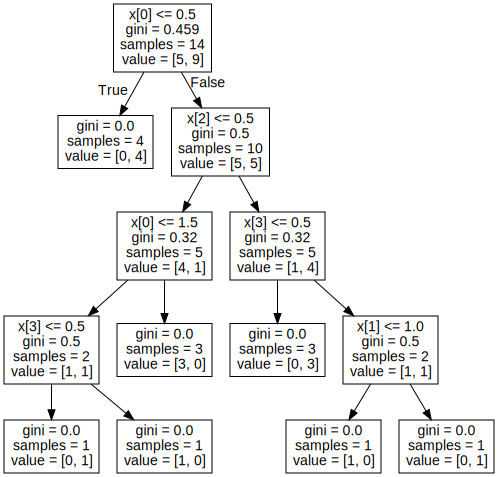

In [ ]:
dot_data = tree.export_graphviz(clfg, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y, y_pred))
print("Precision:",metrics.precision_score(y, y_pred))
print("Recall:",metrics.recall_score(y, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


## Example 2: From the 9 days of market behaviour a table is created. Past trend, Open interest and Trading volume are the factors affecting the market. Create a decision tree to represent the relationship between the features and market behaviour.

\begin{array}{|c|c|c|c|}\hline
		Past Trend&Open Interest&Trading volume&Return\\\hline
		Positive&Low&High&Up\\\hline
		Negative&High&Low&Down\\\hline
		Positive&Low&High&Up\\\hline
		Positive&High&High&Up\\\hline
		Negative&Low&High&Down\\\hline
		Positive&Low&Low&Down\\\hline
		Negative&High&High&Down\\\hline
		Positive&Low&Low&Down\\\hline
		Positive&High&High&Up\\\hline
	\end{array}

**Solution**
As a first step let's create the dataset from the given data

In [ ]:
Past_Trend=["positive","negative","positive","positive","negative","positive","negative","positive","positive"]
Open_Interest=["low","high","low","high","low","low","high","low","high"]
Trading_volume=["high","low","high","high","high","low","high","low","high"]
Return=["up","down","up","up","down","down","down","down","up"]


In [ ]:
import numpy as np


In [ ]:
np.log2(3/5)*3/5


-0.44217935649972373

In [ ]:
dataset ={'Past_Trend':Past_Trend,'Open_Interest':Open_Interest,'Trading_volume':Trading_volume,'windy':windy,'Return':Return}
df = pd.DataFrame(dataset,columns=['Past_Trend','Open_Interest','Trading_volume','Return'])

In [ ]:
df

,Past_Trend,Open_Interest,Trading_volume,Return
0,positive,low,high,up
1,negative,high,low,down
2,positive,low,high,up
3,positive,high,high,up
4,negative,low,high,down
5,positive,low,low,down
6,negative,high,high,down
7,positive,low,low,down
8,positive,high,high,up


In [ ]:
tree=buildTree(df)

In [ ]:
plot_tree(tree)

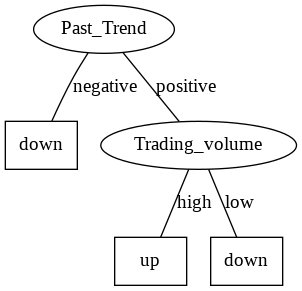

In [ ]:
Image('/content/DecisionTree.png')